In [11]:
import pandas as pd
import json
values = []
time = []
f = open("../data/raw/measures/T-HTU21-measures.json", "r")
for line in f:
    json_parsed = json.loads(line)
    values.append( json_parsed['value'])
    time.append(pd.to_datetime(json_parsed['time']))

We create a Panda's Dataframe to can manage data.

In [12]:
data_obj = {'values':values, 'time': time}
data = pd.DataFrame()
data['values'] = values
data['time'] = pd.Series(time, name="time", dtype='datetime64[s]')
print(data)

         values                time
0         25.09 2017-12-20 12:17:05
1         25.09 2017-12-20 12:17:07
2         25.09 2017-12-20 12:17:09
3         25.09 2017-12-20 12:17:11
4         25.08 2017-12-20 12:17:13
...         ...                 ...
1428378   26.57 2018-03-13 11:41:55
1428379   26.56 2018-03-13 11:41:59
1428380   26.58 2018-03-13 11:42:03
1428381   26.58 2018-03-13 11:42:07
1428382   26.58 2018-03-13 11:42:11

[1428383 rows x 2 columns]


We draw a plot of data. And we can observe that this file haven't got all data. We can observe a holes.

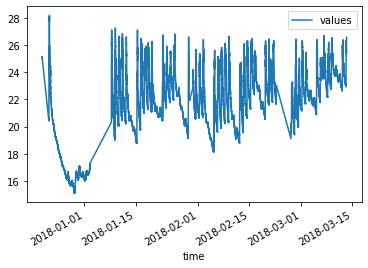

In [13]:
data.plot.line(x = 'time', y = 'values')#%% md

Try de find holes, by finding time difference. Make a plot where can view when data ara lost.

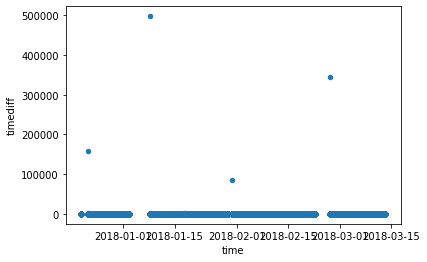

In [14]:
data['timediff'] = (data['time'] -                          data['time'].shift(1)).astype('timedelta64[s]')
data.plot.scatter(x = 'time', y = 'timediff')

We try to get and objective interval acceptable of losing data.

Mode is the most repeated and we could consider is the time that is programmed to get data from devices. So that is 4 seconds. We can filter the lowest times that time increase and we could fit the threshold.

mode 1134283
           values     time
timediff                  
2.0          3530     3530
2.0          3530     3530
3.0          1561     1561
3.0          1561     1561
4.0       1134283  1134283
4.0       1134283  1134283
5.0        279080   279080
5.0        279080   279080
6.0          2435     2435
6.0          2435     2435
7.0           497      497
7.0           497      497
8.0           174      174
8.0           174      174
9.0           131      131
9.0           131      131
10.0           93       93
10.0           93       93
11.0           43       43
11.0           43       43
12.0           24       24
12.0           24       24
13.0          288      288
13.0          288      288
14.0         1302     1302
14.0         1302     1302
15.0         1623     1623
15.0         1623     1623
16.0         1131     1131
16.0         1131     1131
17.0         1186     1186
17.0         1186     1186
18.0          648      648
18.0          648      648
19.0           

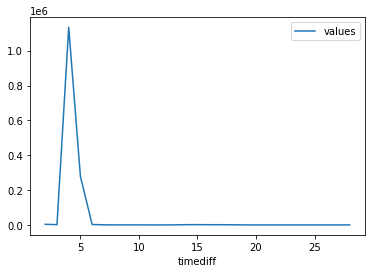

In [15]:
g = data.groupby(['timediff'])
v1 = g.count();
#print(v1)
v2 = v1[v1.values>10]
mode = v1.values.max()
print ("mode", mode)
v2.plot.line(y="values")
print(v2)
#v1.plot.line( y='values')

Try to get interval of lost data. We consider that data is lost if we don't have data during 30 seconds from previous point but we can be more hard fitting value to 7 seconds. We can observe if this threshold goes down the intervals with lost data increases a lot.
We show you all intervals

In [16]:
threshold = 30
data_filter = data[data.timediff.gt(threshold)]

for idx in data_filter.index:
    print( "from", data['time'][idx-1], "to", data['time'][idx], "time(s) losed data", data['timediff'][idx] )

from 2017-12-20 12:23:30 to 2017-12-22 08:12:42 time(s) losed data 157752.0
from 2017-12-22 08:29:02 to 2017-12-22 08:53:15 time(s) losed data 1453.0
from 2017-12-22 10:46:34 to 2017-12-22 10:50:35 time(s) losed data 241.0
from 2017-12-22 11:20:32 to 2017-12-22 11:21:06 time(s) losed data 34.0
from 2017-12-22 11:23:12 to 2017-12-22 11:24:08 time(s) losed data 56.0
from 2017-12-22 11:26:48 to 2017-12-22 11:27:21 time(s) losed data 33.0
from 2017-12-22 11:28:40 to 2017-12-22 11:30:01 time(s) losed data 81.0
from 2018-01-02 14:28:04 to 2018-01-08 08:39:10 time(s) losed data 497466.0
from 2018-01-08 08:43:43 to 2018-01-08 09:07:30 time(s) losed data 1427.0
from 2018-01-09 11:36:40 to 2018-01-09 11:37:13 time(s) losed data 33.0
from 2018-01-17 08:39:04 to 2018-01-17 08:39:59 time(s) losed data 55.0
from 2018-01-17 18:25:32 to 2018-01-17 18:26:44 time(s) losed data 72.0
from 2018-01-17 18:26:44 to 2018-01-17 18:27:43 time(s) losed data 59.0
from 2018-01-17 21:04:04 to 2018-01-17 21:25:27 tim

Finally, we don't need to change o delete data because this file only have problems of lose data but haven't any erroneous data.
We save in a normalized format to can be loaded easily after.

In [17]:
data.drop(columns="timediff").to_json('../data/processed/T-HTU21-measures.json', orient='records', date_format='iso', indent=2)